# Uvod v Python

## Lecture - 06

Vsebina:
- osnove uporabe paketa **Pandas**

Podrobnejši opis operacij najdete na strani:

- **[Python Pandas](https://pandas.pydata.org/docs/)**
- **[Pandas - W3School](https://www.w3schools.com/python/pandas/default.asp)**

---

Paket **Pandas** deluje nad podatki, ki so zapisani v tabelah, kjer uporablja podatkovno strukturo [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). Naša navezava na Pandas bo uporaba Excelovih tabel kot hrambe podatkov in python okolja kot procesirno orodje za podatke iz Excela.

Podatke v Excelu lahko:
- beremo,
- zapisujemo.

Možne so vse vrste manipulacij po celicah, filtriranje, preskakovanje, ..., skratka neomejene možnosti manipulacije tabel.

---
**Branje iz Excel datoteke**

In [1]:
import pandas as pd

In [2]:
data_01 = pd.read_excel('test_data_read.xlsx', sheet_name='data_01') # MS Excel reader
data_02 = pd.read_excel('test_data_read.xlsx', sheet_name='data_02') # MS Excel reader

In [3]:
head_01 = list(data_01.columns)
head_02 = list(data_02.columns)

print(head_01)
print(head_02)

['x [deg]', 'x [rd]', 'sin(x)']
['x [deg]', 'x [rd]', 'cos(x)']


In [4]:
x_deg_01 = data_01[head_01[0]]
x_rd_01 = data_01[head_01[1]]
sin_x_01 = data_01[head_01[2]]

print('column 01 size:', x_deg_01.size)

x_deg_02 = data_02[head_02[0]]
x_rd_02 = data_02[head_02[1]]
cos_x_02 = data_02[head_02[2]]

print('column 02 size:', x_deg_02.size)

column 01 size: 73
column 02 size: 73


In [5]:
import math as mat
import numpy as np
import matplotlib.pyplot as mpl # knjižnjica za plot

# MatPlotLib set fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['DejaVu Serif']

# MatPlotLib set LaTeX use
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

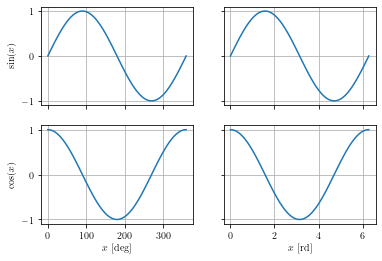

In [6]:
fig, ax = mpl.subplots(2,2)

ax[0,0].plot(x_deg_01,sin_x_01)
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$\sin(x)$')
ax[0,0].grid()

ax[1,0].plot(x_deg_02,cos_x_02)
ax[1,0].set_xlabel('$x$ [deg]')
ax[1,0].set_ylabel('$\cos(x)$')
ax[1,0].grid()

ax[0,1].plot(x_rd_01,sin_x_01)
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].grid()

ax[1,1].plot(x_rd_02,cos_x_02)
ax[1,1].set_xlabel('$x$ [rd]')
ax[1,1].set_yticklabels([])
ax[1,1].grid()

---
**Pisanje v Excel datoteko**

In [7]:
car_head = ['avto','cena [€]']
car_data = [['bmw',40000],['audi',30000],['škoda',20000],['fiat',10000],['zastava',1000]]

print('head:\n', car_head)
print('\ndata:\n', car_data)

head:
 ['avto', 'cena [€]']

data:
 [['bmw', 40000], ['audi', 30000], ['škoda', 20000], ['fiat', 10000], ['zastava', 1000]]


In [8]:
df = pd.DataFrame(data=car_data, columns=car_head)

print('Excel data:\n', df)

Excel data:
       avto  cena [€]
0      bmw     40000
1     audi     30000
2    škoda     20000
3     fiat     10000
4  zastava      1000


In [9]:
writer = pd.ExcelWriter('test_data_write.xlsx')

df.to_excel(writer, sheet_name = 'all-None')
df.to_excel(writer, sheet_name = 'I-F', index=False)
df.to_excel(writer, sheet_name = 'H-F', header=False)
df.to_excel(writer, sheet_name = 'I-F + H-F', index=False, header=False)

writer.save()
writer.close()